<a href="https://colab.research.google.com/github/droyktton/clases_ME_IB/blob/main/ME_Modelo_de_Ising_3x3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%html
<marquee style='width: 100%; color: blue;'><b> gracias a Física Computacional y a Pablo Cornaglia por el notebook - Instituto Balseiro</b></marquee>


#Modelo de Ising

Vamos a aplicar el método de Monte Carlo para resolver el **modelo de Ising**  que es uno de los más importantes en la historia de la física estadística.

El modelo de Ising está dado por el siguiente hamiltoniano:
$$
H=-J\sum_{\left<i, j\right>} \sigma_i \sigma_j
$$
donde $J$ es una constante con unidades de energía, $\sigma_i$ puede tomar solo dos valores: $\{-1,1\}$, los índices $i$ y $j$ corresponden a puntos en una red periódica  y $\langle i,j\rangle$ indica que la suma está restringida a los vecinos más cercanos en la red (se cuenta cada par una vez).

* En una dimensión espacial (1D) los $i$ son los números enteros ($i=\ldots,-3,-2,-1,0,1,2,3,\ldots$) y los vecinos más cercanos (primeros vecinos) de un punto $k$ son los puntos $k-1$ y $k+1$.
* Para la red cuadrada en 2D cada índice corresponde a dos números enteros $i\to(i_x,i_y)$, $j\to(j_x,j_y)$ y los primeros vecinos son los que cumplen $|i_x-j_x|+|i_y-j_y|=1$. Cada punto tiene $4$ primeros vecinos.

En el modelo, las redes tienen infintos puntos pero para los cálculos numéricos vamos a trabajar con redes de tamaño finito (con un número fijo de sitios en cada dirección)

Este modelo representa una red de espines en un sistema con una alta anisotropía uniaxial que hace que los espines solo puedan estar apuntando en dos direcciones (arriba: $\sigma= 1$ y abajo: $\sigma=-1$). Podemos pensar a los espines como dipolos magnéticos que van a tener una tendencia a estar paralelos (para $J>0$) o antiparalelos (para $J<0$) con los vecinos, debido a las interacciones entre ellos.  

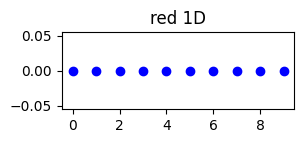

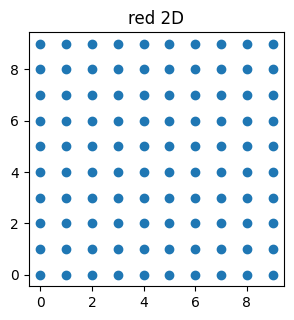

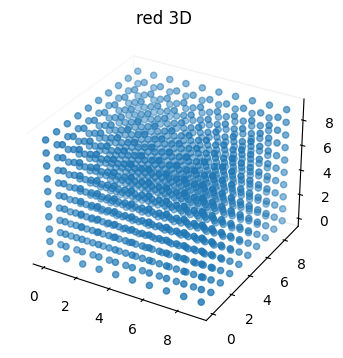

In [ ]:
# @title
#El siguiente código genera las redes de $10$ (1D), $10x10$ (2D) y $10x10x10$ (3D) sitios
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1D
plt.figure(figsize=(3, 1))
plt.plot([i for i in range(10)], [0 for _ in range(10)], 'bo')
plt.title('red 1D')
plt.show()

# 2D
plt.figure(figsize=(3.3, 3.3))
x, y = [], []
for i in range(10):
    for j in range(10):
        x.append(i)
        y.append(j)
plt.scatter(x, y)
plt.title('red 2D')
plt.show()

# 3D
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection='3d')
x, y, z = [], [], []
for i in range(10):
    for j in range(10):
        for k in range(10):
            x.append(i)
            y.append(j)
            z.append(k)
ax.scatter(x, y, z)
ax.set_title('red 3D')

ax.grid(False)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False


plt.show()


El modelo de Ising fue inicialmente propuesto por el físico W. Lenz en 1920 con el objetivo de estudiar el comportamiento del ferromagnetismo en función de la temperatura. En términos generales, si se calienta lo suficiente a un material ferromagnético, este presenta una transición de fase y deja de tener propiedades magnéticas. Esto ocurre a la temperatura de Curie ($T_c$) por su descubridor en 1895, la cual es menor que la temperatura de fusión del material. En el punto en que $T=T_c$, el sistema presenta un pico muy marcado en su calor específico, y si la temperatura se aumenta por arriba de $T_c$, el material se vuelve paramagnético, es decir, su magnetización se reduce a cero.

Ising, en 1925, durante su doctorado, logró resolver analíticamente el modelo en una dimensión y encontró que $T_c$ era igual a cero. A partir de este resultado, se pensó inicialmente que el el modelo de Ising no presentaba  transiciones de fase. Esta conclusión fue refutada por Peierls en 1936, quien demostró que el modelo de Ising en dos dimensiones sí presenta una transición de fase. Finalmente, fue Onsager en 1944 quien logró resolver el modelo de Ising analíticamente en dos dimensiones, confirmando la existencia de la transición de fase.

El calor específico del modelo de Ising en 2D presenta una divergencia logarítmica a la temperatura
$$
T_C = \frac{2}{\ln(1+\sqrt{2})}J/k_B\sim  2.3 J/k_B
$$
por debajo de la cual aparece una magnetización finita.
La magnetización se define como
$$
M = \sum_i \sigma_i.
$$
Para un estado con todos los espines alineados vamos a tener $M = \pm$ número de sitios. Que es lo que esperamos a temperatura cero. Para  $T\lesssim T_C$ (por debajo pero cerca de $T_C$) la magnetización tiene un comportamiento del tipo ley de potencia con la temperatura
$$
M\propto (T_c-T)^{1/8}
$$
el exponente $1/8$ se conoce como exponente crítico y *depende de la dimensión* del sistema.


Al tener una solución analítica, el modelo de Ising en 2D ha sido utilizado como referencia para desarrollar métodos numéricos y aproximaciones analíticas. Además, permite estudiar comportamientos universales (exponentes críticos) cerca de la transición de fase.





## Ising de $3 \times 3$

Vamos a considerar primero una red cuadrada de $3\times 3$ sitios con condiciones periódicas de contorno.

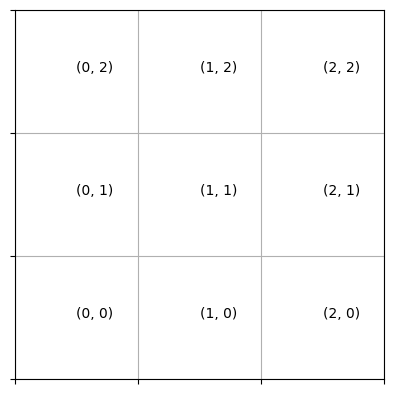

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.set_xticks([0, 1, 2, 3])
ax.set_yticks([0, 1, 2, 3])
ax.grid(True)

for i in range(3):
    for j in range(3):
        ax.text(i + 0.5, j + 0.5, f'({i}, {j})')

ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
ax.set_aspect('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()


entre paréntesis figuran las coordenadas de cada celda (sitio de la red de Ising). Las celdas vecinas a la central $(1,1)$ son  $\{(1,0),(0,1),(2,1),(1,2) \}$. A las 8 celdas restantes les falta algún vecino, por ejemplo la celda $(2,2)$ no tiene vecinos ni arriba ni a la derecha. Para evitar ver efectos de borde (en este sistema casi todo es borde) vamos a considerar condiciones periódicas de contorno. Esto es, cuando llegamos a un borde continuamos del otro lado. De esa forma las vecinas de la celda $(2,2)$ son $\{(1,2),(2,1),(2,0),(0,2) \}$  y la celda vecina a la izquierda de $(0,1)$ es $(2,1)$.

Una forma compacta de obtener las coordenadas de las celdas vecinas es usar congruencias. Si estamos parados en la celda $(i_x,i_y)$ y queremos encontrar las 4 celdas vecinas, hacemos:
$$
\begin{align}
((i_x+1)\mod N_x,&&\, i_y)\\
((i_x-1)\mod N_x,&&\, i_y)\\
(i_x,&&(i_y+1)\mod N_y)\\
(i_x,&&(i_y+1)\mod N_y)
\end{align}
$$
$N_x=N_y=3$ es el número de sitios en cada dirección y $m \mod n$ da el resto de dividir $m$ por $n$. Si el resto es negativo, se le suma $n$ para que quede con el mismo signo que $n$. Por ejemplo $-7\mod 3$ daría un resto de $-1$ pero el resultado de la operación es $-1+3=2$. Así que: $-1\mod 3=2$. En `Python` y `C++` el operador $ n\mod m$ es: `n%m`.


In [ ]:
# Genera coordenadas de celdas vecinas

Nx = 3
Ny = 3
for ix in range(Nx):
    for iy in range(Ny):
        # Celdas vecinas usando CCP
        print(f'({ix},{iy})-> ({(ix-1)%Nx},{iy}), ({(ix+1)%Nx},{iy}), ({ix},{(iy-1)%Ny}), ({ix},{(iy+1)%Ny})')

(0,0)-> (2,0), (1,0), (0,2), (0,1)
(0,1)-> (2,1), (1,1), (0,0), (0,2)
(0,2)-> (2,2), (1,2), (0,1), (0,0)
(1,0)-> (0,0), (2,0), (1,2), (1,1)
(1,1)-> (0,1), (2,1), (1,0), (1,2)
(1,2)-> (0,2), (2,2), (1,1), (1,0)
(2,0)-> (1,0), (0,0), (2,2), (2,1)
(2,1)-> (1,1), (0,1), (2,0), (2,2)
(2,2)-> (1,2), (0,2), (2,1), (2,0)


Para este sistema de $3\times 3$ podemos obtener todas las configuraciones posibles de los espines porque tenemos 2 posibilidades en cada uno de los $3\cdot 3=9$ sitios: $2^9=512$.  Hay varias formas de obtener esas configuraciones (de la representación binaria de los números del 0 al 511 o haciendo loops anidados). Python tiene la libreria [itertools](https://docs.python.org/3/library/itertools.html) que genera ese tipo de combinatorias.

In [ ]:
import numpy as np
import itertools
import sys

Nx = 3
Ny = 3

# todas las configuraciones
configs=list(itertools.product([-1, 1], repeat=Nx*Ny))

cuenta =0
for config in configs:
    cuenta +=1
    if(cuenta < 4 or cuenta > len(configs)-3):
        # Reordena como matriz de 3x3 por filas
        conf3x3 = np.array(config).reshape((3, 3))
        print(conf3x3)
    if(cuenta == 3):
        print(".\n.\n.")

print("hay ", cuenta, " configuraciones")

[[-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]]
[[-1 -1 -1]
 [-1 -1 -1]
 [-1 -1  1]]
[[-1 -1 -1]
 [-1 -1 -1]
 [-1  1 -1]]
.
.
.
[[ 1  1  1]
 [ 1  1  1]
 [ 1 -1  1]]
[[ 1  1  1]
 [ 1  1  1]
 [ 1  1 -1]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]
hay  512  configuraciones


Para calcular la energía de una configuración necesitamos definir el valor de la constante de acoplamiento $J$ y sumar sobre todos los pares de vecinos. Si calculamos la enegía iterando sobre todas las celdas y consideramos todos los vecinos de cada una de ellas, vamos a estar contando dos veces la interacción. Podemos dividir por dos al final, pero es más eficiente considerar dos vecinos para cada celda (el de la derecha y el de arriba) y de esa manera contamos todas las interacciones y ninguna de más.



In [ ]:
import numpy as np
import itertools

# interaccion
J = 1.0 # > 0 -> ferromagnética

def calcula_magnet(espines):
    magnetizacion = 0
    for ix in range(Nx):
        for iy in range(Ny):
           magnetizacion += espines[ix, iy]
    return magnetizacion


def calcula_energia(espines):
    energia = 0.0
    for ix in range(Nx):
        for iy in range(Ny):
            # Usando condiciones de contorno periódicas y sumando 1 vez cada interacción entre pares
            energia += -J * espines[ix, iy] * (espines[(ix+1) % Nx, iy] + espines[ix, (iy+1) % Nx])
    return energia

# todas las configuraciones
configs=list(itertools.product([-1, 1], repeat=Nx*Ny))

energias_posibles = []
magnetizaciones_posibles = []

cuenta =0
for config in configs:
    cuenta +=1

    energia_config = calcula_energia(conf3x3)
    magnetizacion_config = calcula_magnet(conf3x3)
    energias_posibles.append(energia_config)
    magnetizaciones_posibles.append(magnetizacion_config)

    if(cuenta < 5 or cuenta > len(configs)-5):
        # Reordena como matriz de 3x3 por filas
        conf3x3 = np.array(config).reshape((3, 3))
        print(conf3x3, energia_config, magnetizacion_config)

    if(cuenta == 5):
        print(".\n.\n.")




print("hay ", cuenta, " configuraciones")
print("hay ", len(set(energias_posibles)), " energias distintas")
print("hay ", len(set(magnetizaciones_posibles)), " magnetizaciones distintas")

#print("M=",magnetizaciones_posibles)
#print("E=",energias_posibles)

[[-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]] -18.0 9
[[-1 -1 -1]
 [-1 -1 -1]
 [-1 -1  1]] -18.0 -9
[[-1 -1 -1]
 [-1 -1 -1]
 [-1  1 -1]] -10.0 -7
[[-1 -1 -1]
 [-1 -1 -1]
 [-1  1  1]] -10.0 -7
.
.
.
[[ 1  1  1]
 [ 1  1  1]
 [-1  1  1]] -6.0 -5
[[ 1  1  1]
 [ 1  1  1]
 [ 1 -1 -1]] -10.0 7
[[ 1  1  1]
 [ 1  1  1]
 [ 1 -1  1]] -6.0 5
[[ 1  1  1]
 [ 1  1  1]
 [ 1  1 -1]] -10.0 7
[[1 1 1]
 [1 1 1]
 [1 1 1]] -10.0 7
hay  512  configuraciones
hay  3  energias distintas
hay  6  magnetizaciones distintas
M= [9, -9, -7, -7, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5

Como tenemos las configuraciones y las energías podemos calcular todas las cantidades termodiámicas que queramos. Si estamos a una temperatura $T$  tenemos para el valor medio de un observable:
$$
\langle O\rangle_T = \frac{\sum_{\lambda} O_\lambda e^{\beta E_\lambda}}{\sum_{\lambda} e^{\beta E_\lambda}}
$$
donde la suma sobre $\lambda$ es sobre todas las  configuraciones ($512$ en este caso), $O_\lambda$ es valor del observable en la configuración $\lambda$ y  $\beta=1/k_B T$.

Podemos calcular el calor específico de
$$
C=\frac{\partial\langle E\rangle_T }{\partial T} =k_B \beta^2 \left(\langle E^2 \rangle_T - \langle E \rangle_T^2\right)
$$
 (vamos a tomar $k_B=1$ por simplicidad).

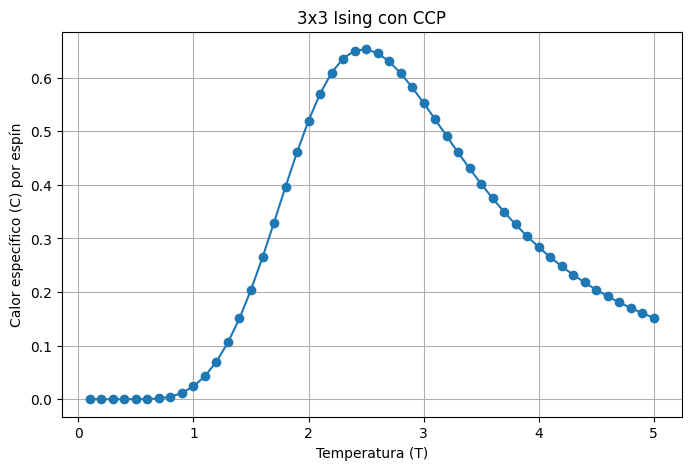

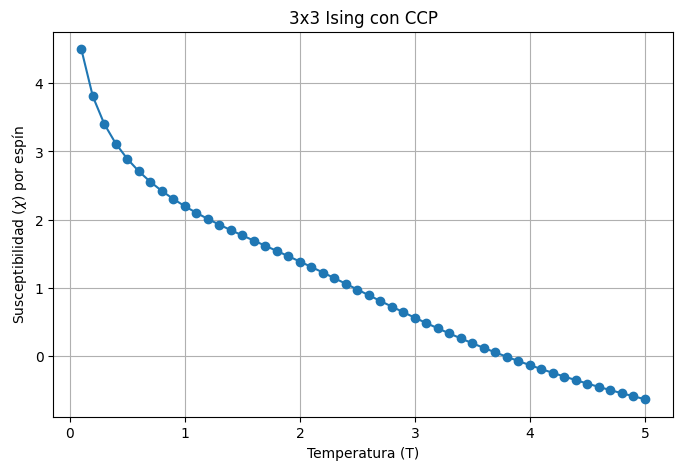

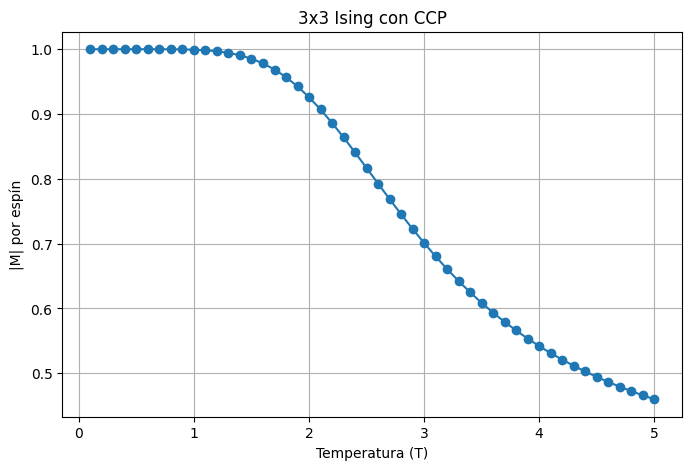

In [ ]:
#@title Calor específico, susceptibilidad y promedio del módulo de la magnetización para algunas T

import numpy as np
import itertools
import matplotlib.pyplot as plt

# parametros
J = 1.0  # interacción
k = 1.0  # constante de Boltzmann

# Tamaño del sistema
Nx = 3
Ny = 3

def calcula_energia(espines):
    energia = 0
    for i in range(Nx):
        for j in range(Ny):
            # vecinas usando CCP
            energia += -J * espines[i, j] * (espines[(i+1) % Nx, j] + espines[i, (j+1) % Ny])
    return energia

def calcula_magnet(espines):
    magnetizacion = 0
    for ix in range(Nx):
        for iy in range(Ny):
           magnetizacion += espines[ix, iy]
    return magnetizacion

# Genera las configuraciones
configs = list(itertools.product([-1, 1], repeat=Nx*Ny))

Temps = np.linspace(0.1, 5, 50)  # temperature range
Cesp = []
Susc = []
absM = []

for T in Temps:
    beta = 1 / (k * T)

    # F. de partición
    Z = 0.0
    # Energía promedio
    avg_E = 0.0
    # Energía cuadrática promedio
    avg_E2 = 0.0

    # Magnetización promedio
    avg_absM = 0.0

    # Magnetización cuadrática promedio
    avg_M2 = 0.0

    for config in configs:
        espines = np.array(config).reshape((Nx, Ny))

        E = calcula_energia(espines)
        factor_boltzmann = np.exp(-beta * E)
        Z += factor_boltzmann
        avg_E += E * factor_boltzmann
        avg_E2 += E**2 * factor_boltzmann

        M = calcula_magnet(espines)
        avg_M2 += M*M*factor_boltzmann
        avg_absM += np.abs(M)*factor_boltzmann

    # Divide la suma por la función de partición
    avg_E /= Z
    avg_E2 /= Z
    avg_M2 /= Z
    avg_absM /= Z

    # Calor específico
    C = beta**2 * (avg_E2 - avg_E**2)/(Nx*Ny)
    Cesp.append(C)
    absM.append(avg_absM/(Nx*Ny))

    # Fluctuaciones de la magnetización
    chi = beta*(avg_M2)/(Nx*Ny)
    Susc.append(chi)


plt.figure(figsize=(8, 5))
plt.plot(Temps, Cesp, 'o-')
plt.xlabel('Temperatura (T)')
plt.ylabel('Calor específico (C) por espín')
plt.title(f'{Nx}x{Ny} Ising con CCP')
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(Temps, np.log(Susc), 'o-')
plt.xlabel('Temperatura (T)')
plt.ylabel('Susceptibilidad ($\chi$) por espín')
plt.title(f'{Nx}x{Ny} Ising con CCP')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(Temps, absM, 'o-')
plt.xlabel('Temperatura (T)')
plt.ylabel('|M| por espín')
plt.title(f'{Nx}x{Ny} Ising con CCP')
plt.grid(True)
plt.show()



Vemos que aparece un pico en el calor específico para $T_C\sim 2.4$ y que la altura del pico crece al aumentar el tamaño del sistema. Esto es consistente con el resultado analítico para la temperatura de transición exacta:
$$
\frac{k_B T_C}{J} = \frac{2}{\ln(1+\sqrt{2})}\sim  2.3
$$
pero en el límite termodinámico el calor específico por espín $C/(N_x\cdot N_y)$ tiene en realidad una divergencia logarítmica.

 El problema que tenemos con esta estrategia es que el número de configuraciones crece como $2^{N_x\cdot N_y}$, que para un sistema de $10 \times 10$ es $2^{100}=1267650600228229401496703205376$ es claramente intratable. El programa de arriba es un poco ineficiente porque calcula para cada temperatura las energías de cada configuración y determina la celdas vecinas varias veces..., pero arreglar esas cosas no nos va a permitir ir mucho más lejos.

 * ¿Cuánto vale $\langle M\rangle_T$ calculado así?



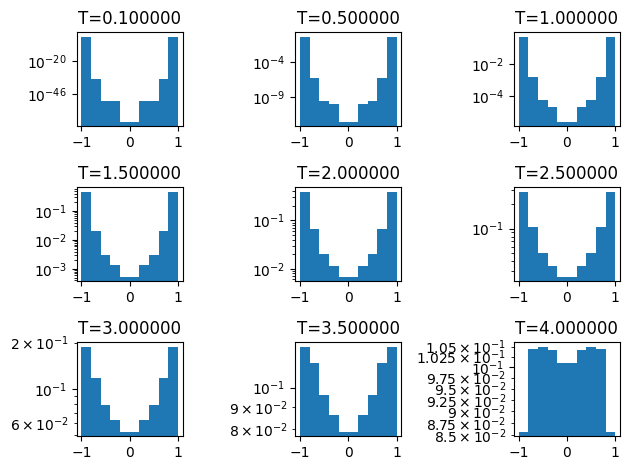

In [ ]:
#@title Cálculo de histogramas $P(M)$ para algunas $T$

import numpy as np
import itertools
import matplotlib.pyplot as plt

# parametros
J = 1.0  # interacción
k = 1.0  # constante de Boltzmann

# Tamaño del sistema
Nx = 3
Ny = 3

def calcula_energia(espines):
    energia = 0
    for i in range(Nx):
        for j in range(Ny):
            # vecinas usando CCP
            energia += -J * espines[i, j] * (espines[(i+1) % Nx, j] + espines[i, (j+1) % Ny])
    return energia

def calcula_magnet(espines):
    magnetizacion = 0
    for ix in range(Nx):
        for iy in range(Ny):
           magnetizacion += espines[ix, iy]
    return magnetizacion

# Genera las configuraciones
configs = list(itertools.product([-1, 1], repeat=Nx*Ny))

p=1
for T in [0.1,0.5,1.0,1.5,2.0,2.5,3.0, 3.5, 4.0]:
    beta = 1 / (k * T)

    # F. de partición
    Z = 0.0

    MT = []
    pesos = []

    for config in configs:
        espines = np.array(config).reshape((Nx, Ny))

        E = calcula_energia(espines)
        factor_boltzmann = np.exp(-beta * E)
        Z += factor_boltzmann

        M = calcula_magnet(espines)

        MT.append(M/(Nx*Ny))
        pesos.append(factor_boltzmann)

    pesos=pesos/Z
    plt.subplot(3, 3, p)
    plt.title(f"T=%f" % T)
    plt.hist(MT,weights=pesos, bins=10)
    #plt.ylim(0.0000001,0.5)
    plt.gca().set_yscale("log")
    p=p+1

plt.tight_layout()
plt.show()



In [ ]:
import numpy as np

# Create a NumPy array (vector)
my_array = np.array([1, 2, 2, 3, 4, 4, 5])
np.append(my_array,6)


# Use numpy.unique() to find unique elements
unique_elements = np.unique(my_array)

# Print the number of unique elements
print(f"Number of unique elements: {len(unique_elements)}")


Number of unique elements: 5
